In [1]:
%matplotlib inline

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import sklearn


from sklearn.preprocessing import normalize
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report

/Users/christophelanternier/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
DATA_PATH = '../data/'

INPUT_TRAIN = DATA_PATH+'input_train.csv'
OUTPUT_TRAIN = DATA_PATH+'output_train.csv'
INPUT_TEST = DATA_PATH+'input_test.csv'

In [5]:
input_train = pd.read_csv(INPUT_TRAIN,index_col='Id')
output_train = pd.read_csv(OUTPUT_TRAIN,sep=';',index_col='Id')
input_test = pd.read_csv(INPUT_TEST,index_col='Id')

In [6]:
ID_broken = output_train[(output_train['2014']==1) | (output_train['2015']==1)].index.tolist()

In [7]:
input_broken = input_train.iloc[ID_broken]

# Introductory Visualization 

The purpose of this part is to plot some very basic plots, in order to have a better understanding of the data, and make sure we don't miss any obvious trends

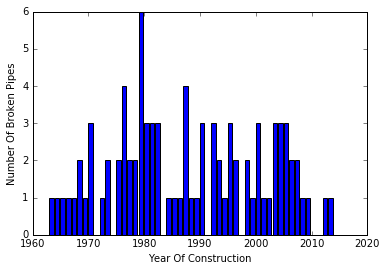

In [9]:
plt.figure()
plt.bar(input_broken.groupby('YearConstruction').count()['Feature1'].index,input_broken.groupby('YearConstruction').count()['Feature1'].tolist())
plt.ylabel('Number Of Broken Pipes')
plt.xlabel('Year Of Construction')
#plt.savefig('NumberOfFriendsDistribution', bbox_inches='tight')

plt.show()

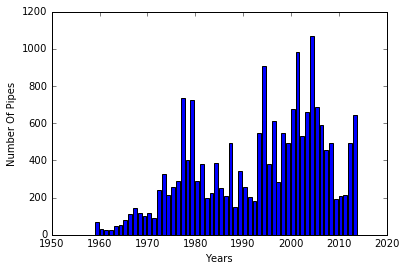

In [10]:
plt.figure()
plt.bar(input_train.groupby('YearConstruction').count()['Feature1'].index[1:],input_train.groupby('YearConstruction').count()['Feature1'].tolist()[1:])
plt.ylabel('Number Of Pipes')
plt.xlabel('Years')
#plt.savefig('NumberOfFriendsDistribution', bbox_inches='tight')

plt.show()

In [11]:
input_broken['Length'] = input_broken['Length'].apply(lambda x: int(round(x)))

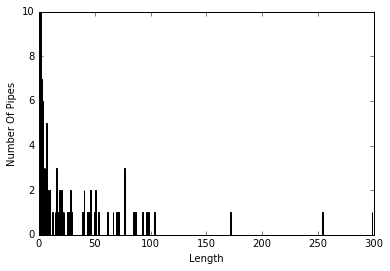

In [12]:
plt.figure()
plt.bar(input_broken.groupby('Length').count()['Feature1'].index,input_broken.groupby('Length').count()['Feature1'].tolist())
plt.ylabel('Number Of Pipes')
plt.xlabel('Length')
#plt.savefig('NumberOfFriendsDistribution', bbox_inches='tight')

plt.show()

In [13]:
input_train['Length'] = input_train['Length'].apply(lambda x: int(round(x)))

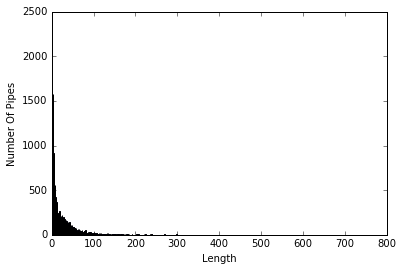

In [14]:
plt.figure()
plt.bar(input_train.groupby('Length').count()['Feature1'].index,input_train.groupby('Length').count()['Feature1'].tolist())
plt.ylabel('Number Of Pipes')
plt.xlabel('Length')
#plt.savefig('NumberOfFriendsDistribution', bbox_inches='tight')

plt.show()

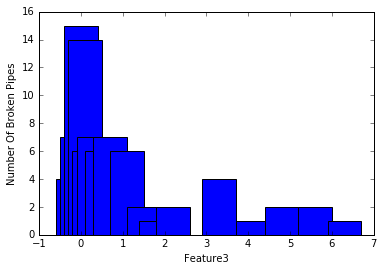

In [17]:
input_broken['Feature3'] = input_broken['Feature3'].apply(lambda x: round(x, 1))
plt.figure()
plt.bar(input_broken.groupby('Feature3').count()['Feature1'].index,input_broken.groupby('Feature3').count()['Feature1'].tolist())
plt.ylabel('Number Of Broken Pipes')
plt.xlabel('Feature3')
#plt.savefig('NumberOfFriendsDistribution', bbox_inches='tight')

plt.show()

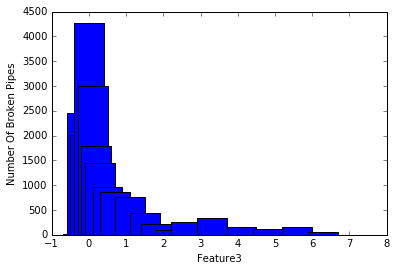

In [18]:
input_train['Feature3'] = input_train['Feature3'].apply(lambda x: round(x, 1))
plt.figure()
plt.bar(input_train.groupby('Feature3').count()['Feature1'].index,input_train.groupby('Feature3').count()['Feature1'].tolist())
plt.ylabel('Number Of Broken Pipes')
plt.xlabel('Feature3')
#plt.savefig('NumberOfFriendsDistribution', bbox_inches='tight')

plt.show()

## Check unnamed features

In [41]:
input_broken[~input_broken['YearLastFailureObserved'].isnull()]

,Feature1,Feature2,Feature3,Feature4,Length,YearConstruction,YearLastFailureObserved
Id,,,,,,,
4055,T,U,-0.6,C,28,1977,2010.0
10087,T,U,0.7,D,70,1988,2007.0


In [43]:
input_train[~input_train['YearLastFailureObserved'].isnull()].shape

(290, 7)

In [36]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt


def plot_bar_from_counter(counter, ax=None):
    """"
    This function creates a bar plot from a counter.

    :param counter: This is a counter object, a dictionary with the item as the key
     and the frequency as the value
    :param ax: an axis of matplotlib
    :return: the axis wit the object in it
    """

    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111)

    frequencies = counter.values()
    names = counter.keys()

    x_coordinates = np.arange(len(counter))
    ax.bar(x_coordinates, frequencies, align='center')

    ax.xaxis.set_major_locator(plt.FixedLocator(x_coordinates))
    ax.xaxis.set_major_formatter(plt.FixedFormatter(names))

    return ax


Broken Pipes distribution for feature:  Feature1


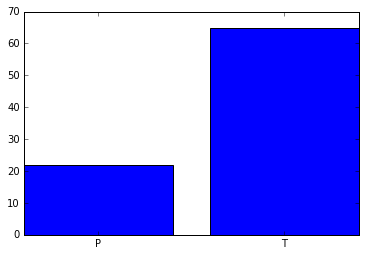

ALL Pipes distribution for feature:  Feature1


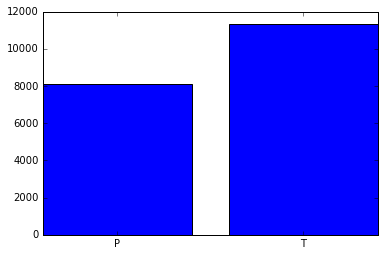

In [37]:
feature = 'Feature1'
print "Broken Pipes distribution for feature: ", feature
a = input_broken[feature].tolist()
letter_counts = Counter(a)

plot_bar_from_counter(letter_counts)
plt.show()
print "ALL Pipes distribution for feature: ", feature
a = input_train[feature].tolist()
letter_counts = Counter(a)

plot_bar_from_counter(letter_counts)
plt.show()

Broken Pipes distribution for feature:  Feature2


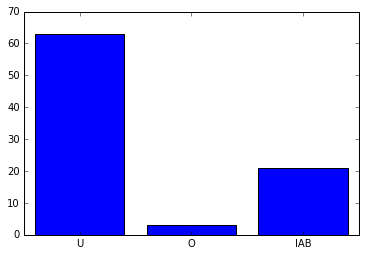

ALL Pipes distribution for feature:  Feature2


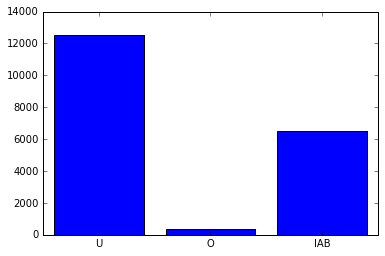

In [38]:
feature = 'Feature2'
print "Broken Pipes distribution for feature: ", feature
a = input_broken[feature].tolist()
letter_counts = Counter(a)

plot_bar_from_counter(letter_counts)
plt.show()
print "ALL Pipes distribution for feature: ", feature
a = input_train[feature].tolist()
letter_counts = Counter(a)

plot_bar_from_counter(letter_counts)
plt.show()

Broken Pipes distribution for feature:  Feature4


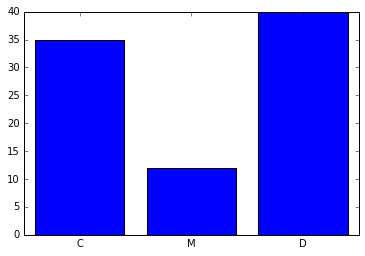

ALL Pipes distribution for feature:  Feature4


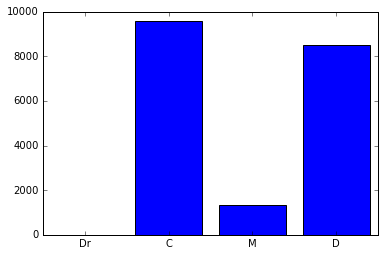

In [40]:
feature = 'Feature4'
print "Broken Pipes distribution for feature: ", feature
a = input_broken[feature].tolist()
letter_counts = Counter(a)

plot_bar_from_counter(letter_counts)
plt.show()
print "ALL Pipes distribution for feature: ", feature
a = input_train[feature].tolist()
letter_counts = Counter(a)

plot_bar_from_counter(letter_counts)
plt.show()